<img src="https://github.com/luishernand/pandas_fundamentals/blob/master/logo4.JPG?raw=true" heiht= 250 width= 250 alt=" ">  

|Fecha|Email|
|-----|-----|
|1 de mayo 2020|luishernandezmatos@yahoo.com

# Predict Stock Price:  
**Descripción:**   
Predecir los valores futuros del precio de cierre de acción de una compañia en la bolsa de valores

### Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
plt.style.use('bmh')

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [20]:
df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-01,374.000000,385.989990,373.170013,378.809998,378.809998,9257300
1,2019-05-02,378.000000,383.500000,374.510010,379.059998,379.059998,5398200
2,2019-05-03,381.529999,385.029999,378.269989,385.029999,385.029999,5130300
3,2019-05-06,377.690002,381.350006,376.000000,378.670013,378.670013,5793100
4,2019-05-07,377.000000,379.910004,365.809998,370.459991,370.459991,6974900


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
Date         254 non-null object
Open         254 non-null float64
High         254 non-null float64
Low          254 non-null float64
Close        254 non-null float64
Adj Close    254 non-null float64
Volume       254 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [10]:
df.shape

(254, 7)

### Visulizar datos

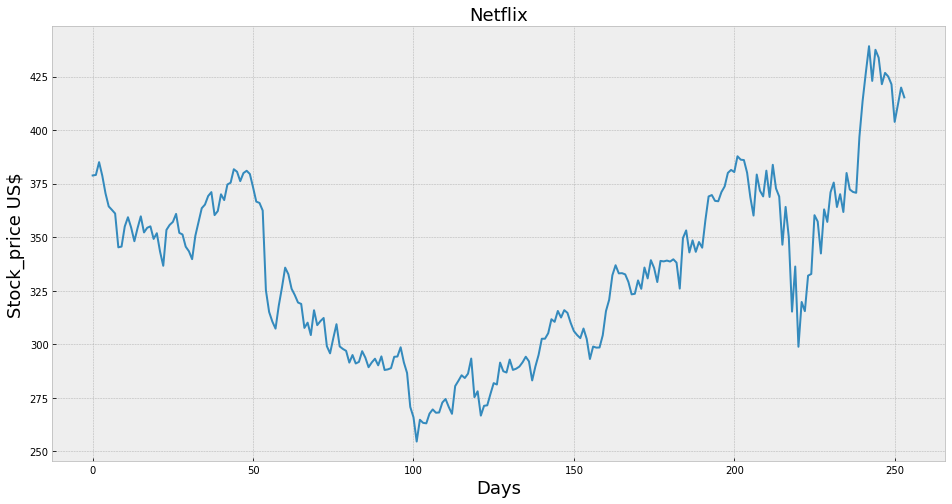

In [6]:
plt.figure(figsize = (16,8))
plt.title('Netflix', size = 18)
plt.xlabel('Days', size = 18)
plt.ylabel('Stock_price US$', size = 18)
plt.plot(df.Close)
plt.show()

In [21]:
# seleccionar solamente el precio de cierre
df =df[['Close']]
df.head()

,Close
0,378.809998
1,379.059998
2,385.029999
3,378.670013
4,370.459991


In [22]:
#crear variable de x day para [predecir el futuro]
future_days = 25
#nueva columna response o target
df["prediction"] = df[['Close']].shift(-future_days)
df.head()

,Close,prediction
0,378.809998,357.130005
1,379.059998,360.869995
2,385.029999,352.010010
3,378.670013,351.269989
4,370.459991,345.559998


In [23]:
df.tail()

,Close,prediction
249,421.380005,NaN
250,403.829987,NaN
251,411.890015,NaN
252,419.850006,NaN
253,415.269989,NaN


### variable X and y

In [27]:
X = np.array(df.drop(['prediction'], axis ='columns'))[:-future_days]
y = np.array(df['prediction'])[:-future_days]
X.shape , y.shape

((229, 1), (229,))

### Train/test/split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

### Modelos

In [30]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

###  Predecir los valores futuros

In [33]:
# crear variable 
X_future = df.drop(['prediction'], axis= 'columns')[:-future_days]
# tomr los ultimos valores
X_future = X_future.tail(future_days)
X_future = np.array(X_future)
X_future.shape

(25, 1)

In [34]:
tree_pred = tree.predict(X_future)
lr_pred = lr.predict(X_future)

### Visualizar

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


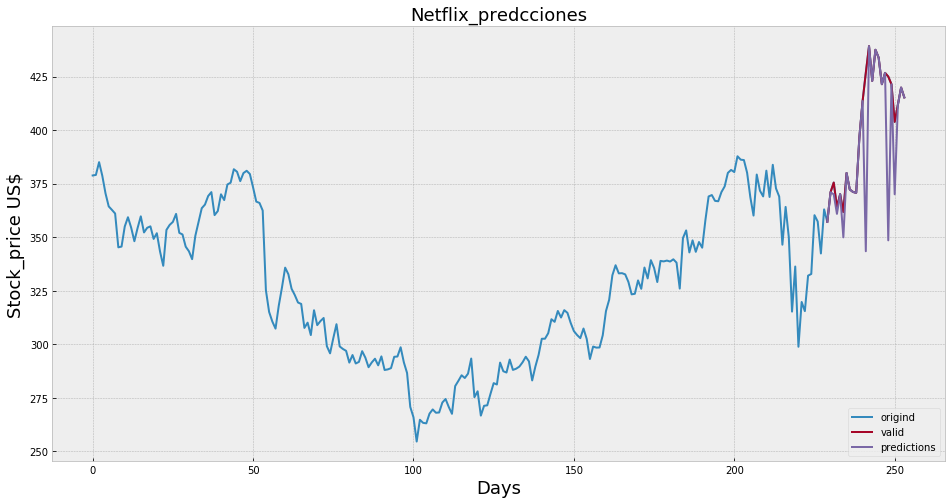

In [41]:
#crear variables:
prediccion = tree_pred
valid = df[X.shape[0]: ]
valid['predictions'] = prediccion

#plotear:
plt.figure(figsize = (16,8))
plt.title('Netflix_predcciones', size = 18)
plt.xlabel('Days', size = 18)
plt.ylabel('Stock_price US$', size = 18)
plt.plot(df.Close)
plt.plot(valid[['Close', 'predictions']])
plt.legend(['origind', 'valid', 'predictions'], loc ='lower right')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


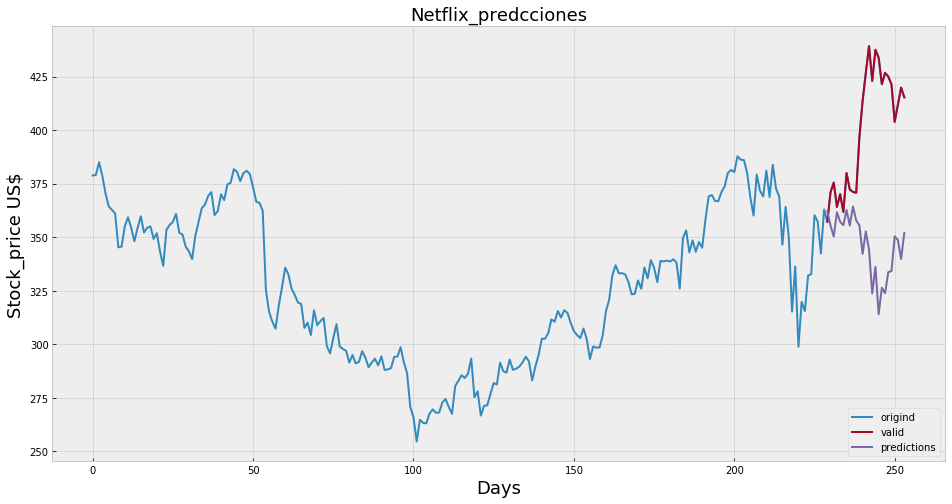

In [40]:
#crear variables:
prediccion = lr_pred
valid = df[X.shape[0]: ]
valid['predictions'] = prediccion

#plotear:
plt.figure(figsize = (16,8))
plt.title('Netflix_predcciones', size = 18)
plt.xlabel('Days', size = 18)
plt.ylabel('Stock_price US$', size = 18)
plt.plot(df.Close)
plt.plot(valid[['Close', 'predictions']])
plt.legend(['origind', 'valid', 'predictions'], loc ='lower right')
plt.show()